In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [153]:
T_test=pd.read_csv("/content/drive/MyDrive/test.csv")
T_train=pd.read_csv("/content/drive/MyDrive/train.csv")
T1=T_train

In [ ]:
T_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
print(T_train.shape)
T_train.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
T_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [191]:
Y_tr=T_train.loc[:,['Survived']]
X_train=T_train.drop(['Survived','Name','Ticket','Fare','Cabin','Embarked','PassengerId'],axis=1)
X_test=T_test.drop(['Name','Ticket','Fare','Cabin','Embarked','PassengerId'],axis=1)
Y_te=pd.read_csv('/content/drive/MyDrive/gender_submission.csv')
Y_test=Y_te.drop('PassengerId',axis=1).to_numpy().ravel()
Y_train=Y_tr.to_numpy().ravel()
Y_train.shape


(891,)

In [ ]:
X_train.tail()

,Pclass,Sex,Age,SibSp,Parch
886,2,male,27.0,0,0
887,1,female,19.0,0,0
888,3,female,NaN,1,2
889,1,male,26.0,0,0
890,3,male,32.0,0,0


In [ ]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


In [192]:
le=LabelEncoder()
#label1=le.fit_transform(X_train['Embarked'])
#label2=le.fit_transform(X_test['Embarked'])
#X_train['Embarked']=label1
#X_test['Embarked']=label2
label1=le.fit_transform(X_train['Sex'])
label2=le.fit_transform(X_test['Sex'])
X_train['Sex']=label1
X_test['Sex']=label2

In [130]:
X_train.tail()

,Pclass,Sex,Age,SibSp,Parch
886,2,1,27.0,0,0
887,1,0,19.0,0,0
888,3,0,NaN,1,2
889,1,1,26.0,0,0
890,3,1,32.0,0,0


<Axes: xlabel='Survived', ylabel='count'>

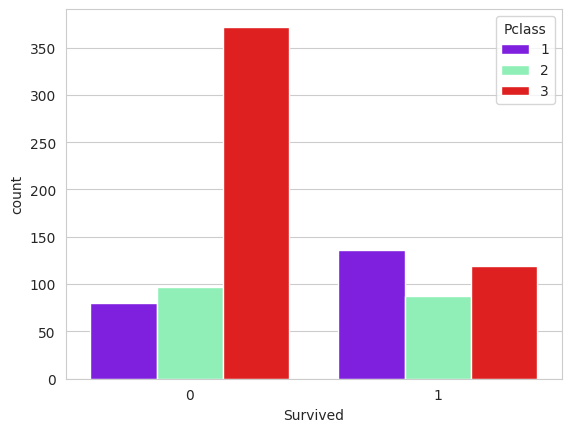

In [119]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=T1, palette='rainbow' )

<ipython-input-118-1c559047238b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=T_train,palette='rainbow')


<Axes: xlabel='Pclass', ylabel='Age'>

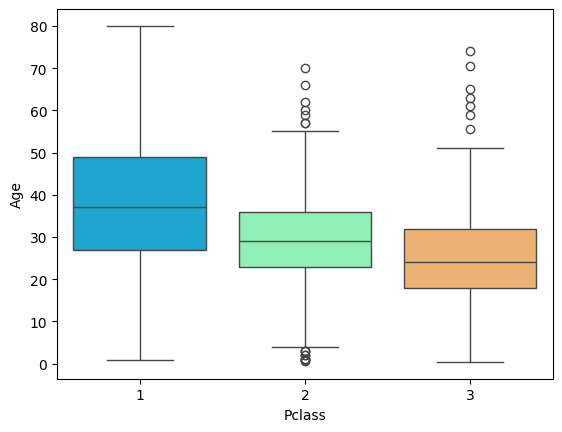

In [118]:
sns.boxplot(x='Pclass',y='Age',data=T_train,palette='rainbow')

In [ ]:
#def impute_age(cols):
#   Passenger_class=cols[0]
#   Age=cols[1]
#   if pd.isnull(Age):
#       if Passenger_class==1:
#          return 38
#       elif Passenger_class==2:
#          return 29
#       elif Passenger_class==3:
#          return 24
#   else:
#       return Age
#X_train['Age']=X_train[['Pclass','Age']].apply(impute_age,axis=1)
#print(X_train['Age'])

In [193]:
def impute_age():
   Pclass=X_train['Pclass']
   Age=X_train['Age']
   for i in range (int(len(Pclass))):
      if pd.isnull(Age[i]):
         if Pclass[i]==1:
           Age[i]=38
         if Pclass[i]==2:
           Age[i]=29
         if Pclass[i]==3:
           Age[i]=24
      else:
          Age[i]=Age[i]
   return Age
X_train['Age']=impute_age()

<ipython-input-193-157d0de7578f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age[i]=Age[i]
<ipython-input-193-157d0de7578f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age[i]=24
<ipython-input-193-157d0de7578f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age[i]=29
<ipython-input-193-157d0de7578f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

In [116]:

X_train.isnull().sum()


Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
dtype: int64

In [194]:
def impute_age1():
   Pclass=X_test['Pclass']
   Age=X_test['Age']
   for i in range (int(len(Pclass))):
      if pd.isnull(Age[i]):
         if Pclass[i]==1:
           Age[i]=38
         if Pclass[i]==2:
           Age[i]=29
         if Pclass[i]==3:
           Age[i]=24
      else:
          Age[i]=Age[i]
   return Age
X_test['Age']=impute_age1()

<ipython-input-194-f68986941a73>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age[i]=Age[i]
<ipython-input-194-f68986941a73>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age[i]=24
<ipython-input-194-f68986941a73>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age[i]=38
<ipython-input-194-f68986941a73>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

In [114]:
X_test.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
dtype: int64

In [205]:
RF=RandomForestClassifier(random_state=42)
RF.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

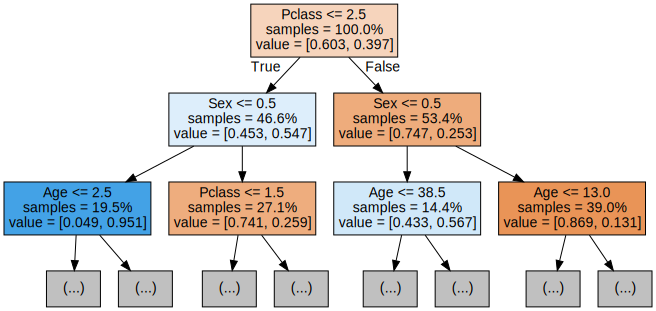

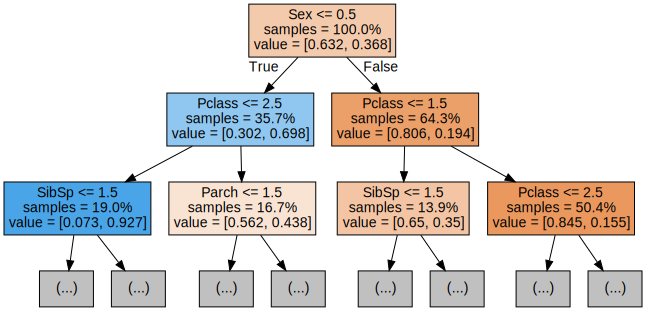

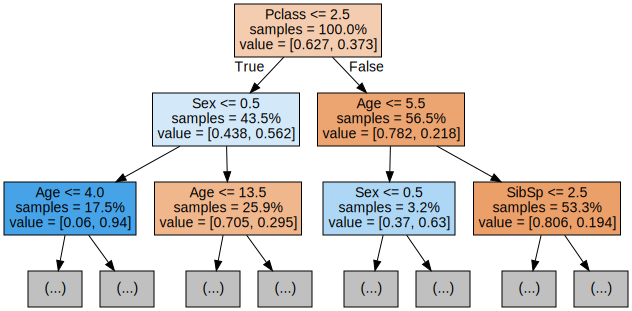

In [206]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = RF.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [212]:
Y_predict_train=RF.predict(X_train)
print(X_train.shape,Y_predict_train.shape,Y_train.shape)
Accuracy_train=accuracy_score(Y_train,Y_predict_train)
print(f'Accuracy for training values :{Accuracy_train*100}%')

(891, 5) (891,) (891,)
Accuracy for training values :91.80695847362514%


In [213]:
Y_predict_test=RF.predict(X_test)
print(X_test.shape,Y_predict_test.shape,Y_test.shape)
Accuracy_test=accuracy_score(Y_test,Y_predict_test)
print(f'Accuracy for testing values :{Accuracy_test*100}%')

(418, 5) (418,) (418,)
Accuracy for testing values :82.29665071770334%


In [209]:
input_data=[3,0,47,1,0]
input_val=np.asarray(input_data)
print(input_val)
input_valreshape=input_val.reshape(1,-1)
Prediction=RF.predict(input_valreshape)
if Prediction==1:
   print("Yes the person survived!")
else:
   print("No the person didn't survive!")


[ 3  0 47  1  0]
No the person didn't survive!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
